# Fundamentos Estadísticos

### Docente: Mg. Jonathan A. Jurado Sandoval

### Comprensión del negocio

**Objetivo del negocio**: Reducir la tasa de churn de clientes en una empresa de telecomunicaciones.

**Objetivo de IA**: Predecir la probabilidad de churn de un cliente en una empresa de telecomunicaciones.

### Comprensión de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as ss
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

##### Descripción de los datos

In [ ]:
data = pd.read_csv('/content/customer_churn_data.csv', sep = ";")

In [7]:
data.head(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
1,2,40,Female,19,36.18,One-Year,Fiber Optic,687.42,Yes,No
2,3,39,Female,41,89.11,Two-Year,Fiber Optic,3653.51,Yes,No
3,4,35,Male,98,49.59,Two-Year,Fiber Optic,4859.82,Yes,No
4,5,59,Female,6,73.56,One-Year,DSL,441.36,No,Yes


In [8]:
data.shape

(234, 10)

In [9]:
data.shape[0]

234

In [10]:
data.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Tenure,int64
MonthlyCharges,float64
ContractType,object
InternetService,object
TotalCharges,float64
TechSupport,object
Churn,object


##### Identificación y tratamiento de valores faltantes

In [11]:
data.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,32
TotalCharges,0
TechSupport,0
Churn,0


In [12]:
100*data.isna().sum()/data.shape[0]

,0
CustomerID,0.000000
Age,0.000000
Gender,0.000000
Tenure,0.000000
MonthlyCharges,0.000000
ContractType,0.000000
InternetService,13.675214
TotalCharges,0.000000
TechSupport,0.000000
Churn,0.000000


In [13]:
data["InternetService"].fillna(data["InternetService"].mode()[0], inplace=True) #Imputación de datos

<ipython-input-13-b4091572e5ba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["InternetService"].fillna(data["InternetService"].mode()[0], inplace=True) #Imputación de datos


In [14]:
data.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       234 non-null    int64  
 1   Age              234 non-null    int64  
 2   Gender           234 non-null    object 
 3   Tenure           234 non-null    int64  
 4   MonthlyCharges   234 non-null    float64
 5   ContractType     234 non-null    object 
 6   InternetService  234 non-null    object 
 7   TotalCharges     234 non-null    float64
 8   TechSupport      234 non-null    object 
 9   Churn            234 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 18.4+ KB


##### Exploración de los datos: Análisis univariado

In [16]:
data.loc[:,['Age','Tenure','MonthlyCharges','TotalCharges']].describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,234.000000,234.000000,234.000000,234.000000
mean,43.641026,23.457265,71.383590,1573.884274
std,9.472310,18.337802,24.176101,1285.173144
min,12.000000,0.000000,30.970000,0.000000
25%,37.250000,10.250000,50.847500,649.060000
50%,44.500000,18.500000,68.195000,1278.845000
75%,50.000000,32.000000,90.752500,2162.415000
max,67.000000,98.000000,119.960000,6607.920000


In [17]:
print('Media:',data['TotalCharges'].mean())
print('Mediana:',data['TotalCharges'].median())
print('Coeficiente de asimetría:',ss.skew(data['TotalCharges']))
print('Coeficiente de curtosis:',ss.kurtosis(data['TotalCharges']))

Media: 1573.8842735042738
Mediana: 1278.8449999999998
Coeficiente de asimetría: 1.314069704191455
Coeficiente de curtosis: 1.825525843360123


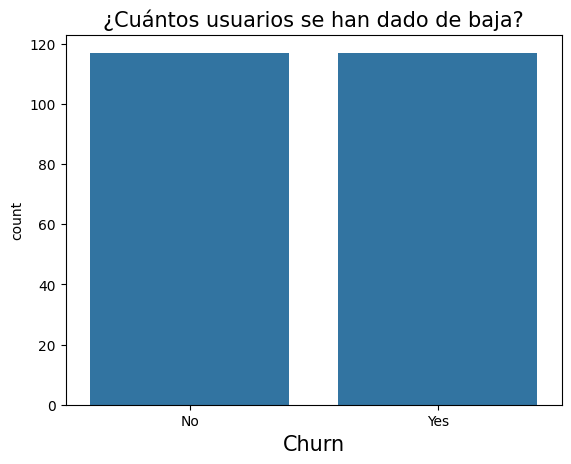

In [18]:
sns.countplot(data = data, x = 'Churn')
plt.xlabel('Churn', fontsize = 15)
plt.title('¿Cuántos usuarios se han dado de baja?', fontsize = 15)
plt.show()

##### Exploración de los datos: Análisis bivariado

In [ ]:
#####################################################
#Churn vs Variables cuantitativas
#####################################################

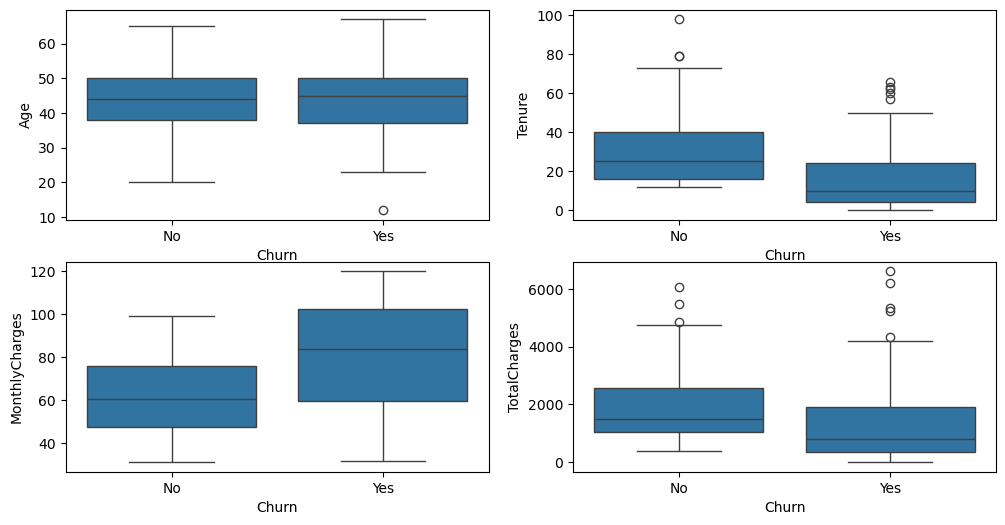

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(x='Churn',y='Age',data=data)

plt.subplot(2,2,2)
sns.boxplot(x='Churn',y='Tenure',data=data)

plt.subplot(2,2,3)
sns.boxplot(x='Churn',y='MonthlyCharges',data=data)

plt.subplot(2,2,4)
sns.boxplot(x='Churn',y='TotalCharges',data=data)

plt.show()

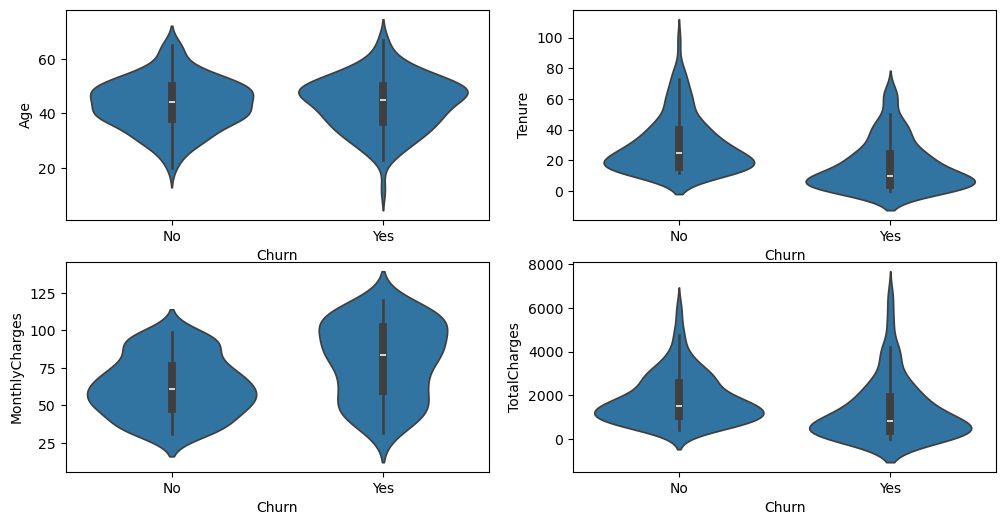

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.violinplot(x='Churn',y='Age',data=data)

plt.subplot(2,2,2)
sns.violinplot(x='Churn',y='Tenure',data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Churn',y='MonthlyCharges',data=data)

plt.subplot(2,2,4)
sns.violinplot(x='Churn',y='TotalCharges',data=data)

plt.show()

In [ ]:
#Prueba U de Mann-Whitney-Wilcoxon

#Ho: los datos proceden de distribuciones con la misma mediana
#Ha: los datos no proceden de distribuciones con la misma mediana

#Si el pvalor < 5% => se rechaza la Ho,
#al 95% de confianza, los datos no proceden de distribuciones con la misma mediana.

#Si el pvalor > 5% => no se rechaza la Ho,
#al 95% de confianza, los datos proceden de distribuciones con la misma mediana.

In [ ]:
#! pip install pingouin

In [ ]:
import pingouin as pg

In [ ]:
#Churn vs Age
age_churn = data.loc[data.Churn == "Yes", "Age"]
age_no_churn = data.loc[data.Churn == "No", "Age"]
pg.mwu(x=age_churn, y=age_no_churn, alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,7084.5,two-sided,0.643454,0.035065,0.517532


In [ ]:
#Churn vs Tenure
tenure_churn = data.loc[data.Churn == "Yes", "Tenure"]
tenure_no_churn = data.loc[data.Churn == "No", "Tenure"]
pg.mwu(x=tenure_churn, y=tenure_no_churn, alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,3396.0,two-sided,2.708966e-11,-0.503835,0.248082


In [ ]:
#Churn vs MonthlyCharges
mcharges_churn = data.loc[data.Churn == "Yes", "MonthlyCharges"]
mcharges_no_churn = data.loc[data.Churn == "No", "MonthlyCharges"]
pg.mwu(x=mcharges_churn, y=mcharges_no_churn, alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,9595.0,two-sided,1.088256e-07,0.401856,0.700928


In [ ]:
#Churn vs TotalCharges
tcharges_churn = data.loc[data.Churn == "Yes", "TotalCharges"]
tcharges_no_churn = data.loc[data.Churn == "No", "TotalCharges"]
pg.mwu(x=tcharges_churn, y=tcharges_no_churn, alternative="two-sided")

,U-val,alternative,p-val,RBC,CLES
MWU,4295.0,two-sided,8.511377e-07,-0.372489,0.313756


**Conclusión**:
Para las variables Churn vs Tenure, Churn vs MonthlyCharges y Churn vs TotalCharges,
al 95% de confianza, los datos no proceden de distribuciones con la misma mediana.

Por lo tanto, las variables Tenure, MonthlyCharges y TotalCharges son potenciales variables predictoras para predecir el churn de clientes.

In [ ]:
#####################################################
#Churn vs Variables cualitativas
#####################################################

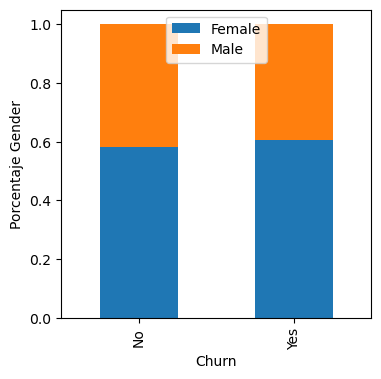

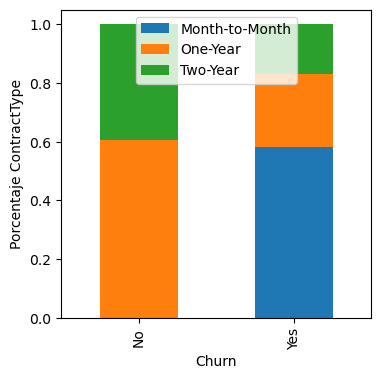

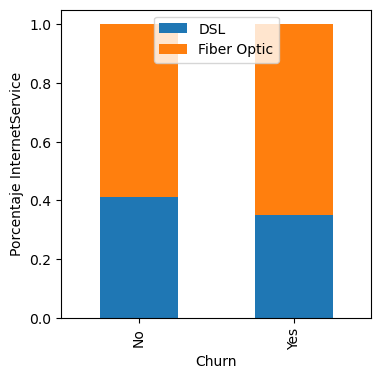

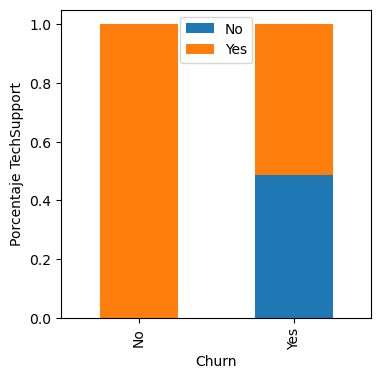

In [ ]:
t1 = pd.crosstab(data["Churn"],data["Gender"])
t1.div(t1.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Churn")
plt.ylabel("Porcentaje Gender")
plt.legend(loc="upper center")

t2 = pd.crosstab(data["Churn"],data["ContractType"])
t2.div(t2.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Churn")
plt.ylabel("Porcentaje ContractType")
plt.legend(loc="upper center")

t3 = pd.crosstab(data["Churn"],data["InternetService"])
t3.div(t3.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Churn")
plt.ylabel("Porcentaje InternetService")
plt.legend(loc="upper center")

t4 = pd.crosstab(data["Churn"],data["TechSupport"])
t4.div(t4.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Churn")
plt.ylabel("Porcentaje TechSupport")
plt.legend(loc="upper center")

plt.show()

In [ ]:
#Prueba Chi-Cuadrado
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

#Si el pvalor < 5% => se rechaza la Ho,
#al 95% de confianza se concluye que existe dependencia entre las variables.

#Si el pvalor > 5% => no se rechaza la Ho,
#al 95% de confianza se concluye que no existe dependencia entre las variables.

In [ ]:
c, p, dof, expected = chi2_contingency(t1)
print("Churn vs Gender:", p)

c, p, dof, expected = chi2_contingency(t2)
print("Churn vs ContractType:", p)

c, p, dof, expected = chi2_contingency(t3)
print("Churn vs InternetService:", p)

c, p, dof, expected = chi2_contingency(t4)
print("Churn vs TechSupport:", p)

Churn vs Gender: 0.790056542452709
Churn vs ContractType: 1.5114581266271128e-21
Churn vs InternetService: 0.41912398283746566
Churn vs TechSupport: 1.4827660086080358e-17


**Conclusión**:
Para las variables Churn vs ContractType, Churn vs InternetService y Churn vs TechSupport,
al 95% de confianza se concluye que existe dependencia entre las variables.

Por lo tanto, las variables ContractType, InternetService y TechSupport son potenciales variables predictoras para predecir el churn de clientes.